In [ ]:
import torch
from torch import nn

In [ ]:
#import california_housing dataset

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
data.target_names

['MedHouseVal']

In [ ]:
#import pandas

import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df["Target"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Target', ylabel='Count'>

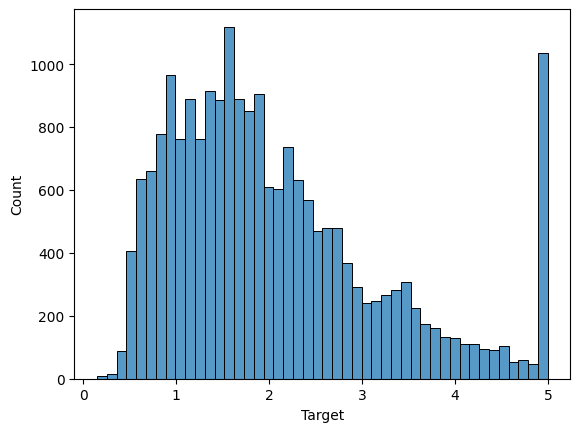

In [ ]:
#visualize

import seaborn as sns

sns.histplot(df["Target"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
X = df.drop("Target", axis=1)
y = df["Target"]

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.dtype, y_train.dtype)
print(X_test.dtype, y_test.dtype)

torch.Size([16512, 8]) torch.Size([16512, 1])
torch.Size([4128, 8]) torch.Size([4128, 1])
torch.float32 torch.float32
torch.float32 torch.float32


In [ ]:
X.shape[1]

8

In [ ]:
#Define the Model

class LinearRegression(nn.Module):
    def __init__(self, input_dim, hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden)
        self.linear2 = nn.Linear(hidden, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
      x = self.linear1(x)
      x = self.relu(x)
      x = self.linear2(x)
      return x

model_1 = LinearRegression(X.shape[1], 16)
model_1, model_1.state_dict()


(LinearRegression(
   (linear1): Linear(in_features=8, out_features=16, bias=True)
   (linear2): Linear(in_features=16, out_features=1, bias=True)
   (relu): ReLU()
 ),
 OrderedDict([('linear1.weight',
               tensor([[-0.2420,  0.0028,  0.3428, -0.2372, -0.3159,  0.0896, -0.0833,  0.1134],
                       [-0.1545,  0.3254,  0.0653,  0.2976,  0.2813,  0.3052, -0.3122,  0.1900],
                       [ 0.0259, -0.2660, -0.2298, -0.2627, -0.1276,  0.3021,  0.1621,  0.2734],
                       [ 0.3160, -0.2816, -0.0460,  0.2963,  0.0767,  0.0786, -0.0841, -0.2081],
                       [-0.2578, -0.1961, -0.0775,  0.3194, -0.1624,  0.0783, -0.3181,  0.1078],
                       [ 0.1411,  0.2234, -0.1807,  0.2555, -0.0877,  0.1082,  0.0955, -0.2356],
                       [-0.1343,  0.1328, -0.1870,  0.1249,  0.0123, -0.0421, -0.1490, -0.0349],
                       [ 0.0527,  0.3205,  0.2421, -0.3499, -0.1011, -0.0165,  0.2417, -0.1122],
                      

In [ ]:
# Create loss function
loss_fn = nn.MSELoss()

# Create optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
#Train the Model

EPOCHS = 100

for epoch in range(EPOCHS):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Evaluate the Model

    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)


    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.44023001194000244 | Test loss: 0.45764660835266113
Epoch: 10 | Train loss: 0.4103468358516693 | Test loss: 0.4407157897949219
Epoch: 20 | Train loss: 0.3971703350543976 | Test loss: 0.429749071598053
Epoch: 30 | Train loss: 0.38846102356910706 | Test loss: 0.42128226161003113
Epoch: 40 | Train loss: 0.3809458315372467 | Test loss: 0.4147084057331085
Epoch: 50 | Train loss: 0.3731938600540161 | Test loss: 0.40775808691978455
Epoch: 60 | Train loss: 0.366398423910141 | Test loss: 0.40165966749191284
Epoch: 70 | Train loss: 0.3596094250679016 | Test loss: 0.3959227502346039
Epoch: 80 | Train loss: 0.35232827067375183 | Test loss: 0.39051076769828796
Epoch: 90 | Train loss: 0.3446217179298401 | Test loss: 0.3835850954055786


In [ ]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[3.4646],
        [5.4355],
        [1.1884],
        ...,
        [2.3880],
        [2.3032],
        [3.3073]])

In [ ]:
# Move tensors to CPU (if using GPU) and convert to NumPy
y_test_np = y_test.numpy()
y_pred_np = y_preds.numpy()

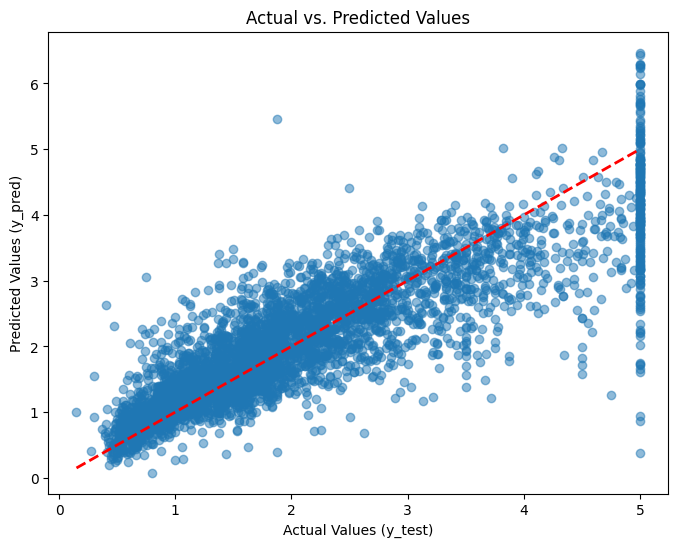

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for perfect predictions
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)],
         color='red', linestyle='--', lw=2)

plt.show()

In [ ]:
X_train[10], y_train[10]

(tensor([ 0.0988,  0.0299,  0.4726, -0.1808,  0.0963, -0.0237, -1.1575,  1.1192]),
 tensor([2.4550]))

In [ ]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_train[10])
y_preds

tensor([2.0992])